In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [16]:
insurance_df = pd.read_csv('Course Materials/Data/insurance.csv')

In [17]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Count'>

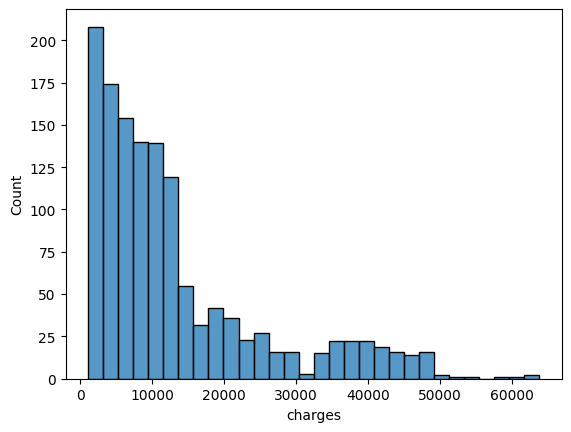

In [18]:
sns.histplot(insurance_df['charges'])

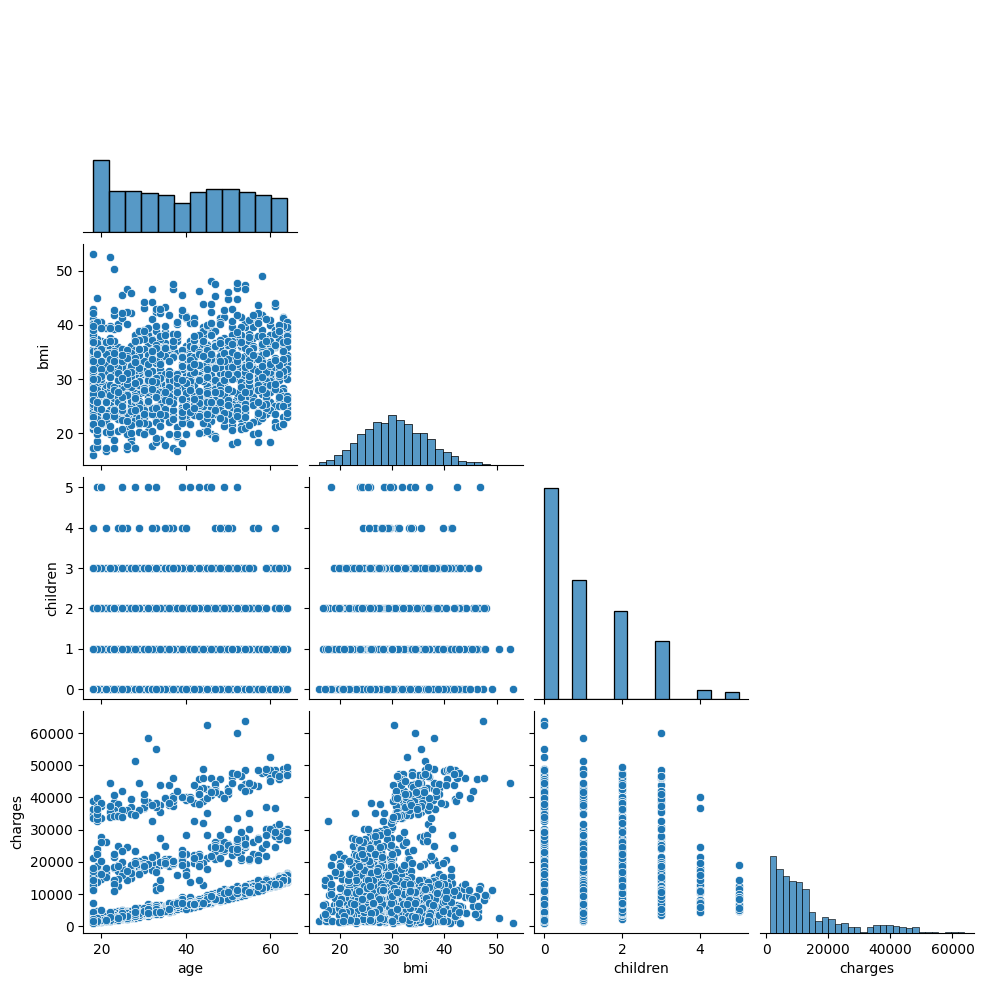

In [19]:
sns.pairplot(insurance_df, corner=True)

In [20]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [21]:
X = sm.add_constant(insurance_df['age'])
y = insurance_df['charges']

In [22]:
model = sm.OLS(y, X).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           4.89e-29
Time:                        21:29:27   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
customer_ages = [18,25,35,45,55]

X_predict = sm.add_constant(pd.DataFrame({
    'age':customer_ages
}))

X_predict

,const,age
0,1.0,18
1,1.0,25
2,1.0,35
3,1.0,45
4,1.0,55


In [25]:
predictions = model.predict(X_predict)
predictions.name = 'predictions'

In [26]:
(insurance_df
.query('age in @customer_ages')
.groupby('age').agg({'charges':'mean'})
.reset_index().merge(predictions, left_index=True, right_index=True)
.assign(error = lambda x: x['predictions'] - x['charges'], pct_difference = lambda x: (x['error'] / x['charges']) * 100)
)

,age,charges,predictions,error,pct_difference
0,18,7086.217556,7804.892142,718.674586,10.141865
1,25,9838.365311,9608.950473,-229.414838,-2.331839
2,35,11307.182031,12186.176659,878.994628,7.773773
3,45,14830.199856,14763.402846,-66.797010,-0.450412
4,55,16164.545488,17340.629033,1176.083544,7.275698


<Axes: ylabel='None'>

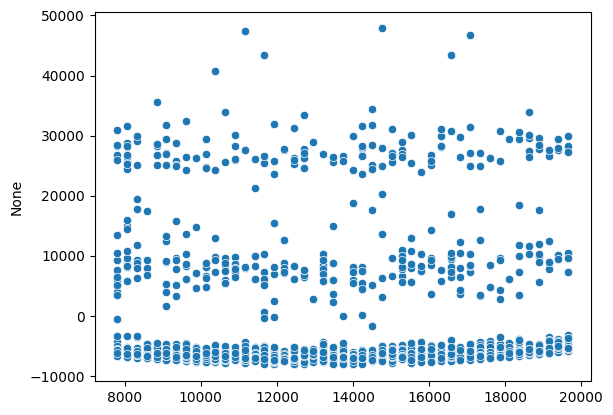

In [27]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [29]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
X = sm.add_constant(insurance_df[['age','bmi','children']])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           8.80e-37
Time:                        21:30:14   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

In [42]:
mae = mae(y, model.predict())
rmse = rmse(y, model.predict())
r2 = r2(y, model.predict())

In [43]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'r2: {r2}')

MAE: 9015.442199156727
RMSE: 11355.317901125973
r2: 0.12009819576246927
